# Exploratory Data Analysis (EDA) and Business Insights

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [68]:
print("Customers Dataset:")
print(customers.head())
print(customers.info())

print("\nProducts Dataset:")
print(products.head())
print(products.info())

print("\nTransactions Dataset:")
print(transactions.head())
print(transactions.info())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving 

# SEARCHING FOR MISSING VALUES
No missing values found 

In [69]:
print("\nMissing values in Customers:")
print(customers.isnull().sum())

print("\nMissing values in Products:")
print(products.isnull().sum())

print("\nMissing values in Transactions:")
print(transactions.isnull().sum())



Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Customer Distribution by Region

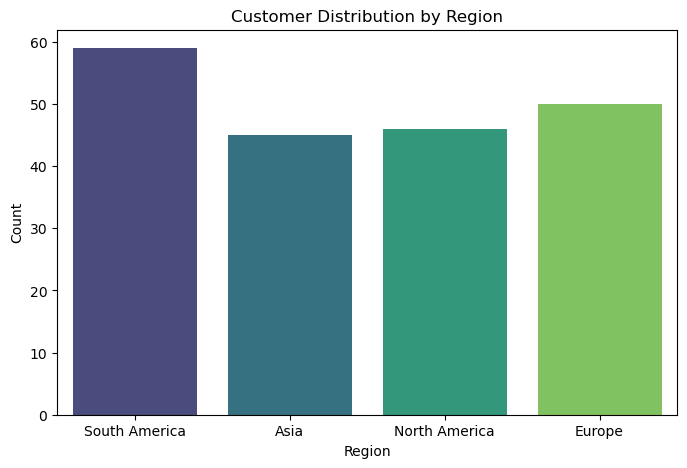

In [70]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

South America appears to dominate in customer distribution compared to other regions.

There is an opportunity to explore the factors driving customer count in South America and see if similar strategies can be applied in other regions to increase their counts.

Asia’s lower customer count relative to North America and Europe could indicate potential for targeted strategies to boost growth there.

# Top 5 customers by total spending

In [86]:
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Total Spending:")
print(top_customers)


Top 5 Customers by Total Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


This analysis helps identify the most valuable customers based on total sales or order value. It allows businesses to focus on their high-value customers and potentially offer them personalized services or rewards to enhance customer retention.

# Top 5 Products by Sales:

Identifying the top-selling products helps businesses manage inventory more effectively, ensuring that high-demand products are adequately stocked.

ActiveWear Smartwatch has the highest sales value, and SoundWave Headphones ranks second. 
This information allows the company to focus on these products for promotions, improved visibility, or even collaborations.


Top 5 Products by Sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


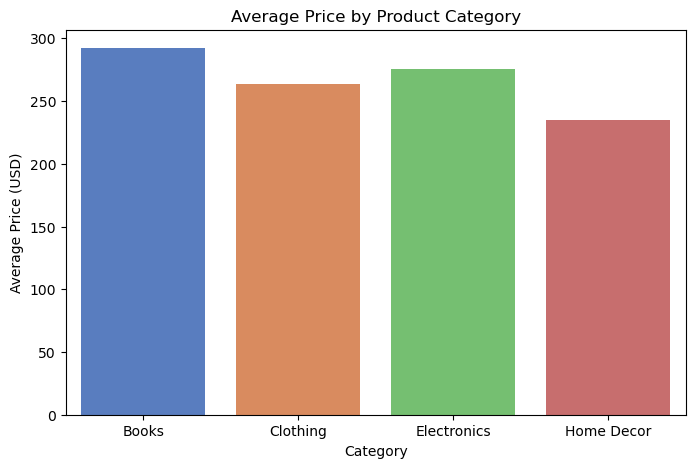

In [77]:
product_sales = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Sales:")
print(product_sales)

# Analyze average price of products by category
avg_price_by_category = products.groupby('Category')['Price'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_by_category, x='Category', y='Price', palette='muted')
plt.title('Average Price by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.show()


This analysis helps identify which product categories contribute the most to overall revenue. 

For example, if one category is generating a disproportionately high amount of total sales, the business can decide to expand that category, improve offerings, or invest more resources in it.

Businesses can make strategic decisions, such as adjusting pricing, adding new products, or even discontinuing less profitable categories.


# Retention Analysis - Repeat Customers:

In [28]:
repeat_customers = data['CustomerID'].value_counts().loc[lambda x: x > 1].count()
print(f"\nNumber of Repeat Customers: {repeat_customers}")


Number of Repeat Customers: 187


From a total of 200 customers, you have 187 repeat customers, this is an excellent sign of customer retention.

It means 93.5% of our customers are coming back to make more purchases, which is a strong indicator of customer satisfaction and loyalty.

# Product Pricing Analysis - Revenue by Price Range:

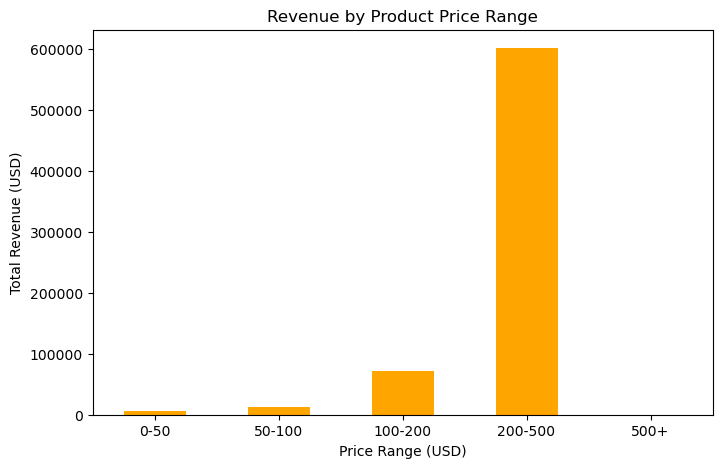

In [31]:
price_bins = pd.cut(products['Price'], bins=[0, 50, 100, 200, 500, 1000], labels=['0-50', '50-100', '100-200', '200-500', '500+'])
products['PriceRange'] = price_bins
price_range_revenue = data.merge(products, on='ProductID').groupby('PriceRange')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
price_range_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by Product Price Range')
plt.xlabel('Price Range (USD)')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=0)
plt.show()

This analysis shows how much revenue is coming from each price segment. For example, here most of the revenue is coming from the 200-500 range, the business might focus on promoting products in that range or optimizing pricing for similar items.

# Churn Prediction (Example: Inactive Customers)

In [39]:
inactive_customers = customers[~customers['CustomerID'].isin(data['CustomerID'].unique())]
print("\nInactive Customers:")
print(inactive_customers)


Inactive Customers:
    CustomerID   CustomerName Region  SignupDate
179      C0180  Amy Carpenter   Asia  2023-10-25


Identifying inactive customers is critical for improving customer retention. Businesses can analyze why certain customers stopped engaging or making purchases and take proactive measures to bring them back.